In [291]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
#loading data from csv file to dataframe
df = pd.read_csv('Mobile Payments.csv')
df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2023,May,334726,77.34,205.88,670.44
1,2023,April,329968,75.96,194.95,615.25
2,2023,March,321149,73.72,204.83,645.80
3,2023,February,323613,74.04,184.82,578.09
4,2023,January,319079,74.41,198.31,589.30
5,2022,December,317983,73.12,207.01,708.06
6,2022,November,315240,73.22,190.46,639.84
7,2022,October,311957,73.22,196.93,646.50
8,2022,September,308799,71.67,189.70,674.47
9,2022,August,310450,70.06,184.81,677.36


In [293]:
#checking if there are any null values
df.isna().sum()

Year                                                 0
Month                                                0
Active Agents                                        0
Total Registered Mobile Money Accounts (Millions)    0
Total Agent Cash in Cash Out (Volume Million)        0
Total Agent Cash in Cash Out (Value KSh billions)    0
dtype: int64

In [294]:
#checking for the datatypes in the dataframe
df.dtypes

Year                                                   int64
Month                                                 object
Active Agents                                          int64
Total Registered Mobile Money Accounts (Millions)    float64
Total Agent Cash in Cash Out (Volume Million)        float64
Total Agent Cash in Cash Out (Value KSh billions)    float64
dtype: object

In [295]:
#checking for dataset info
df.info()
print("----------------------------------------------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               195 non-null    int64  
 1   Month                                              195 non-null    object 
 2   Active Agents                                      195 non-null    int64  
 3   Total Registered Mobile Money Accounts (Millions)  195 non-null    float64
 4   Total Agent Cash in Cash Out (Volume Million)      195 non-null    float64
 5   Total Agent Cash in Cash Out (Value KSh billions)  195 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.3+ KB
----------------------------------------------


,Year,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2014.794872,138882.548718,32.666168,92.778646,254.388035
std,4.714419,102812.520762,22.410557,63.896031,198.166854
min,2007.000000,307.000000,0.020992,0.021714,0.064391
25%,2011.000000,38343.000000,17.611300,32.577750,87.542150
50%,2015.000000,129218.000000,26.333000,89.902400,227.921000
75%,2019.000000,222345.000000,51.203900,150.445500,358.315500
max,2023.000000,334726.000000,77.340000,207.010000,722.520000


From observing the data the columns Active Agents and Total Mobile Money Users only show the total number so i will be adding colums to show the number of new agents and number of new mobile money users per month

In [296]:
#defining an order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#converting the Month column to a categorical type with the defined order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df.reset_index(drop=True, inplace=True)

#sorting the dataframe by Year and Month
df = df.sort_values(by=['Year','Month'])

df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
194,2007,March,307,0.020992,0.021714,0.064391
193,2007,April,362,0.054944,0.070000,0.220896
192,2007,May,447,0.107733,0.150000,0.483709
191,2007,June,527,0.175652,0.233661,0.720102
190,2007,July,681,0.268499,0.354298,1.065370
189,2007,August,819,0.432555,0.516239,1.579910
188,2007,September,960,0.635761,0.669689,2.069690
187,2007,October,1196,0.875962,0.958908,2.829550
186,2007,November,1379,1.133200,1.221740,3.514950
185,2007,December,1582,1.345270,1.274100,3.770270


In [297]:
#calculating new active agents for each month
df['New Monthly Agents'] = df['Active Agents'].diff().fillna(0)

#calculating new mobile money accounts for each month
df['New Monthly Mobile Money Accounts'] = (df['Total Registered Mobile Money Accounts (Millions)'].diff().fillna(0)) * 1000000

df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts
194,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0
193,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0
192,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0
191,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0
190,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0
189,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0
188,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0
187,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0
186,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0
185,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0


Dividing the dataset to three periods, '2007-2011', '2012-2018', '2019-2023'

I'll be naming them period_one, period_two and period_three respectively

In [298]:
period_one = df[(df['Year'] >= 2007) & (df['Year'] <= 2011)]
period_one = pd.DataFrame(period_one)
period_one


,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts
194,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0
193,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0
192,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0
191,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0
190,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0
189,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0
188,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0
187,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0
186,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0
185,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0


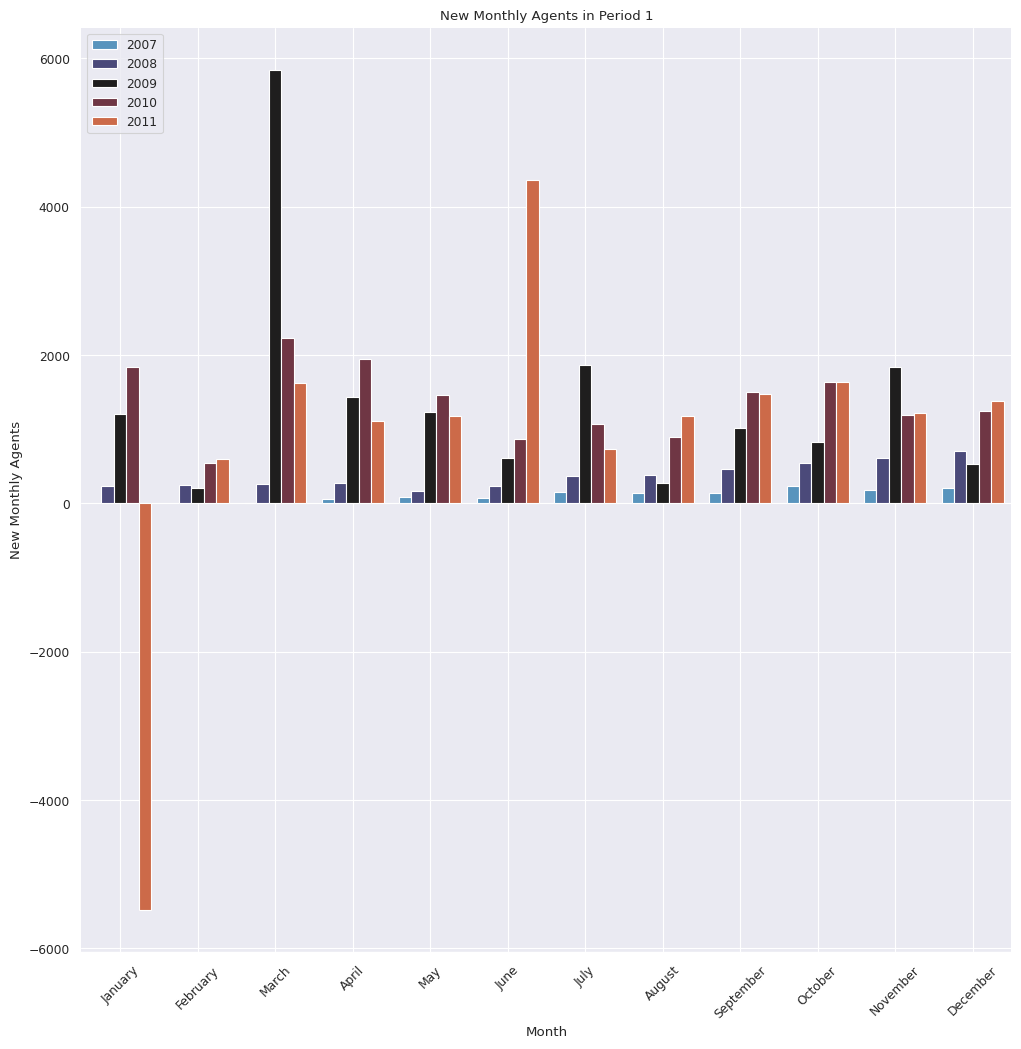

In [299]:
#visualizing the growth of Active Agents

#setting the figure size
plt.figure(figsize=(12,12))

# Define a custom color palette
custom_palette = sns.color_palette("icefire", n_colors=len(period_one['Year'].unique()))

# Set the palette for the plot
sns.set_palette(custom_palette)

#creating a lineplot
ax = sns.barplot(x="Month", y="New Monthly Agents", hue="Year", data=period_one, palette=custom_palette) 
plt.title("New Monthly Agents in Period 1")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.despine(left=True)
plt.legend(loc='upper left')
plt.xlabel("Month")
plt.ylabel("New Monthly Agents")
plt.xticks(rotation=45)

sns.set_style("darkgrid")
plt.grid(True)

plt.show()



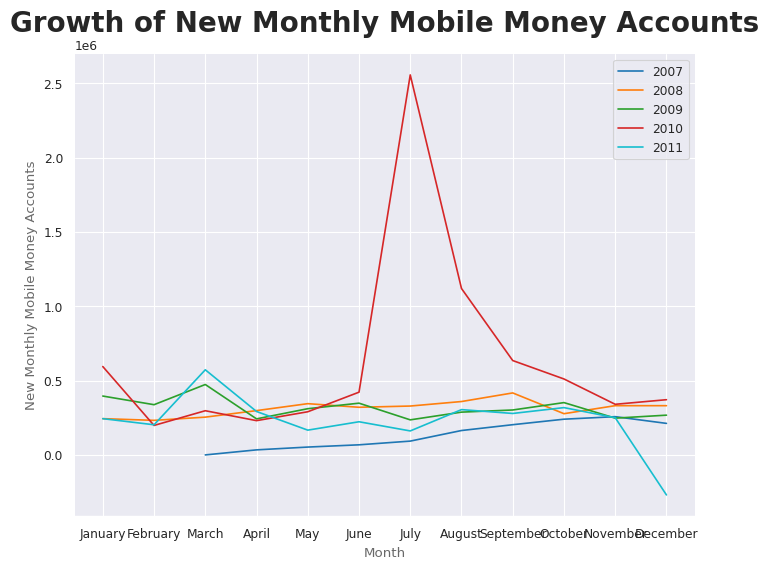

In [300]:
#visualizing the growth of registered mobile money accounts

#setting the figure size
import seaborn as sns
plt.figure(figsize=(8,6))

#defining color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf']

#creating the plot
sns.lineplot(x="Month", y="New Monthly Mobile Money Accounts", hue="Year", data=period_one, palette=colors)
plt.title("Growth of New Monthly Mobile Money Accounts", fontdict={'fontsize':20, 'fontweight':'bold'})
sns.despine(left=True)
plt.legend(loc='upper right')
plt.xlabel("Month", color='dimgray')
plt.ylabel("New Monthly Mobile Money Accounts", color='dimgray')
plt.grid(True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

sns.set_context('paper')
sns.set_style('whitegrid')

plt.show()

In [301]:
#calculating how many active agents are there annually
annual_agents = period_one.groupby('Year')['New Monthly Agents'].sum().reset_index()

#merging into period one
period_one = pd.merge(period_one, annual_agents, on='Year', suffixes=('', '_Annual'))
#period_one['Annual Agents'] = period_one['Annual Agents'].apply(lambda x: '{:,.2f}'.format(x))

#renaming the column
period_one.rename(columns={'New Monthly Agents_Annual':'Annual Agents'}, inplace=True)

period_one.head(10)


,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts,Annual Agents
0,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0,1275.0
1,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0,1275.0
2,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0,1275.0
3,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0,1275.0
4,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0,1275.0
5,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0,1275.0
6,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0,1275.0
7,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0,1275.0
8,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0,1275.0
9,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0,1275.0


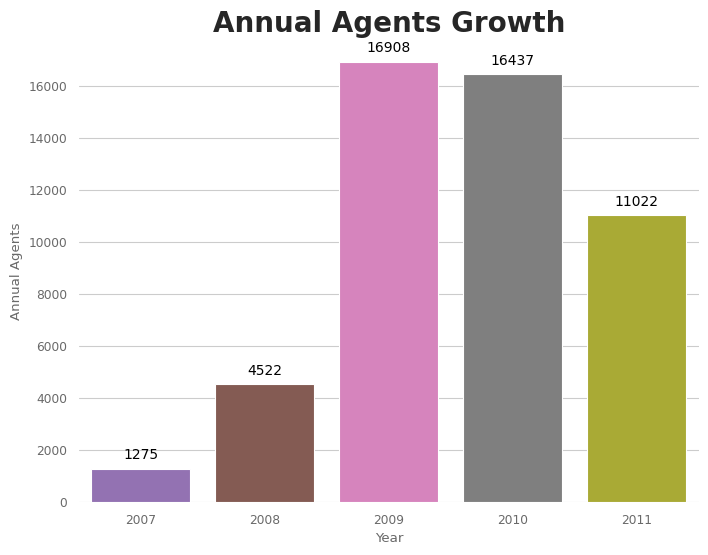

In [302]:
muted_color = 'dimgray'

# Convert 'Year' column to integer
period_one['Year'] = period_one['Year'].astype(int)

#visualizing the growth of agents annually

plt.figure(figsize=(8,6))

#defining color palette
colors = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(sns.color_palette(colors))


ax = sns.barplot(x='Year', y='Annual Agents', data=period_one)

for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),fontsize=10, color='Black',
                textcoords = 'offset points')
    
#mute label color
ax.set_xlabel('Year', color=muted_color)
ax.set_ylabel('Annual Agents', color=muted_color)
ax.tick_params(axis='x', colors=muted_color)
ax.tick_params(axis='y', colors=muted_color)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)



sns.despine(left=True, right=True, top=True, bottom=True)
sns.set_style('whitegrid')
sns.set_context('paper')
#plt.grid(True)
plt.title('Annual Agents Growth', fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

In [303]:
#calculating the annual number of registered monile money accounts
import pandas as pd
period_one['Total Registered Mobile Money Accounts (Millions)'] = period_one['Total Registered Mobile Money Accounts (Millions)'] * 1000000
period_one['Total Registered Mobile Money Accounts (Millions)'] = period_one['Total Registered Mobile Money Accounts (Millions)'].apply(lambda x:  '{:,.2f}'.format(x))

annual_mobile_money_users = period_one.groupby('Year')['New Monthly Mobile Money Accounts'].sum().reset_index()

#merging into period one
period_one = pd.merge(period_one, annual_mobile_money_users, on='Year', suffixes=('', '_Annual'))
period_one['New Monthly Mobile Money Accounts'] = period_one['New Monthly Mobile Money Accounts'].apply(lambda x:  '{:,.2f}'.format(x))

#renaming the column
period_one.rename(columns={'New Monthly Mobile Money Accounts_Annual':'Annual Mobile Money Accounts'}, inplace=True)

period_one

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts,Annual Agents,Annual Mobile Money Accounts
0,2007,March,307,"20,992.00",0.021714,0.064391,0.0,0.00,1275.0,1324278.0
1,2007,April,362,"54,944.00",0.070000,0.220896,55.0,"33,952.00",1275.0,1324278.0
2,2007,May,447,"107,733.00",0.150000,0.483709,85.0,"52,789.00",1275.0,1324278.0
3,2007,June,527,"175,652.00",0.233661,0.720102,80.0,"67,919.00",1275.0,1324278.0
4,2007,July,681,"268,499.00",0.354298,1.065370,154.0,"92,847.00",1275.0,1324278.0
5,2007,August,819,"432,555.00",0.516239,1.579910,138.0,"164,056.00",1275.0,1324278.0
6,2007,September,960,"635,761.00",0.669689,2.069690,141.0,"203,206.00",1275.0,1324278.0
7,2007,October,1196,"875,962.00",0.958908,2.829550,236.0,"240,201.00",1275.0,1324278.0
8,2007,November,1379,"1,133,200.00",1.221740,3.514950,183.0,"257,238.00",1275.0,1324278.0
9,2007,December,1582,"1,345,270.00",1.274100,3.770270,203.0,"212,070.00",1275.0,1324278.0


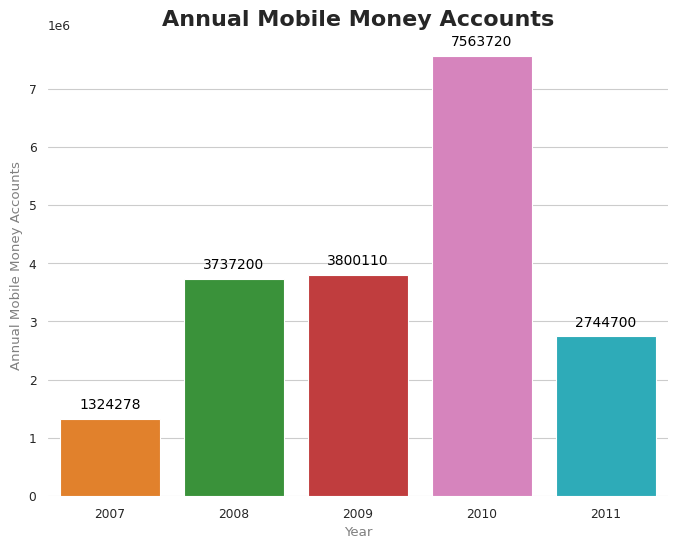

In [304]:
#visualizing the annual growth of registered mobile money accounts
plt.figure(figsize=(8,6))

#defining color palette
colors = ['#ff7f0e', '#2ca02c', '#d62728',  '#e377c2',  '#17becf']
sns.set_palette(sns.color_palette(colors))


ax = sns.barplot(x='Year', y='Annual Mobile Money Accounts', data=period_one)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center',
                va='center', fontsize=10, color='black',
                xytext=(0, 10), textcoords='offset points')
    
ax.set_xlabel('Year', color='gray')
ax.set_ylabel('Annual Mobile Money Accounts', color='gray')


sns.despine(left=True, right=True, bottom=True)
sns.set_style('whitegrid')
#plt.grid(True)
plt.title('Annual Mobile Money Accounts',  fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

In [305]:
#converting the total volume transacted 
period_one['Total Agent Cash in Cash Out (Volume Million)'] = period_one['Total Agent Cash in Cash Out (Volume Million)'] * 1000000
period_one['Total Agent Cash in Cash Out (Volume Million)'] = period_one['Total Agent Cash in Cash Out (Volume Million)'].apply(lambda x: '{:,.2f}'.format(x))

#converting the total value transacted
period_one['Total Agent Cash in Cash Out (Value KSh billions)'] = period_one['Total Agent Cash in Cash Out (Value KSh billions)'] * 1000000000
period_one['Total Agent Cash in Cash Out (Value KSh billions)'] = period_one['Total Agent Cash in Cash Out (Value KSh billions)'].apply(lambda x: '{:,.2f}'.format(x))

period_one.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts,Annual Agents,Annual Mobile Money Accounts
0,2007,March,307,"20,992.00","21,714.00","64,390,500.00",0.0,0.00,1275.0,1324278.0
1,2007,April,362,"54,944.00","70,000.00","220,896,000.00",55.0,"33,952.00",1275.0,1324278.0
2,2007,May,447,"107,733.00","150,000.00","483,709,000.00",85.0,"52,789.00",1275.0,1324278.0
3,2007,June,527,"175,652.00","233,661.00","720,102,000.00",80.0,"67,919.00",1275.0,1324278.0
4,2007,July,681,"268,499.00","354,298.00","1,065,370,000.00",154.0,"92,847.00",1275.0,1324278.0
5,2007,August,819,"432,555.00","516,239.00","1,579,910,000.00",138.0,"164,056.00",1275.0,1324278.0
6,2007,September,960,"635,761.00","669,689.00","2,069,690,000.00",141.0,"203,206.00",1275.0,1324278.0
7,2007,October,1196,"875,962.00","958,908.00","2,829,550,000.00",236.0,"240,201.00",1275.0,1324278.0
8,2007,November,1379,"1,133,200.00","1,221,740.00","3,514,950,000.00",183.0,"257,238.00",1275.0,1324278.0
9,2007,December,1582,"1,345,270.00","1,274,100.00","3,770,270,000.00",203.0,"212,070.00",1275.0,1324278.0
